In [1]:
import os
import sys
import common
import FSRCNN_model_scale_2
import numpy as np
import pycuda.autoinit
import tensorrt as trt
from matplotlib import pyplot as plt 
import h5py
from torchsummary import summary
import torch
import datetime
from math import log10, sqrt
import cv2
import numpy as np
import math  
from PIL import Image
from skimage.metrics import structural_similarity as ssim

In [2]:
TRT_LOGGER = trt.Logger(trt.Logger.WARNING)

class ModelData(object):
    INPUT_NAME = "data"
    INPUT_SHAPE = (1, 400, 400)
    OUTPUT_NAME = "prob"
#     OUTPUT_SIZE = 10
    DTYPE = trt.float32

In [3]:

def populate_network(network, weights):
    # Configure the network layers based on the weights provided.
    
       #FIRST PART
    
    input_tensor = network.add_input(name=ModelData.INPUT_NAME, dtype=ModelData.DTYPE, shape=ModelData.INPUT_SHAPE)

    conv1_w = weights['first_part.0.weight'].numpy()
    conv1_w=np.expand_dims(conv1_w,axis=0)
    conv1_b = weights['first_part.0.bias'].numpy()
    conv1 = network.add_convolution_nd(input=input_tensor, num_output_maps=56, kernel_shape=(5,5), kernel=conv1_w, bias=conv1_b)
    conv1.stride_nd = (1, 1)
    conv1.padding_nd = (2, 2)
    
    conv1_p= weights['first_part.1.weight'].numpy()#.reshape(-1)
#     conv1_p = np.expand_dims(conv1_p,axis=0)
    conv1_p = np.expand_dims(conv1_p,axis=0)
    conv1_p = np.expand_dims(conv1_p,axis=0)
    conv1_p=np.transpose(conv1_p,(2,1,0))

    print(conv1_p.shape,"conv1_p.shape")
    print(conv1.get_output(0).shape,"conv1.get_output(0).shape")
    
    para1=network.add_constant(shape=(56,1,1),weights=conv1_p)
    

    para_relu1=network.add_parametric_relu(input=conv1.get_output(0),slopes=para1.get_output(0))

    
    

    #MID PART
    
    
    conv2_w = weights['mid_part.0.weight'].numpy()
    conv2_b = weights['mid_part.0.bias'].numpy()
    conv2 = network.add_convolution_nd(input=para_relu1.get_output(0), num_output_maps=12, kernel_shape=(1,1), kernel=conv2_w,bias=conv2_b)
    conv2.stride_nd = (1, 1)                                                                            #0

    
    conv2_p= weights['mid_part.1.weight'].numpy()#.reshape(-1)

    conv2_p = np.expand_dims(conv2_p,axis=0)
    conv2_p = np.expand_dims(conv2_p,axis=0)
    conv2_p=np.transpose(conv2_p,(2,1,0))

    print(conv2_p.shape,"conv2_p.shape")
    print(conv2.get_output(0).shape,"conv2.get_output(0).shape")
    
    
    para2=network.add_constant(shape=(12,1,1),weights=conv2_p)
    print(para2.shape)
    

    para_relu2=network.add_parametric_relu(input=conv2.get_output(0),slopes=para2.get_output(0))
    
    
 #1

    
    
    conv3_w = weights['mid_part.2.weight'].numpy()
    conv3_b = weights['mid_part.2.bias'].numpy()
    conv3 = network.add_convolution_nd(input=para_relu2.get_output(0), num_output_maps=12, kernel_shape=(3,3), kernel=conv3_w, bias=conv3_b)
    conv3.stride_nd = (1, 1)
    conv3.padding_nd = (1, 1)                                                                            #2
    
    
    
    
    
    conv3_p= weights['mid_part.3.weight'].numpy()#.reshape(-1)

    conv3_p = np.expand_dims(conv3_p,axis=0)
    conv3_p = np.expand_dims(conv3_p,axis=0)
    conv3_p=np.transpose(conv3_p,(2,1,0))

    print(conv3_p.shape,"conv3_p.shape")
    print(conv3.get_output(0).shape,"conv3.get_output(0).shape")
    
    
    para3=network.add_constant(shape=(12,1,1),weights=conv3_p)
    print(para3.shape)
    

    para_relu3=network.add_parametric_relu(input=conv3.get_output(0),slopes=para3.get_output(0))
    
    
    
      #3
    
    conv4_w = weights['mid_part.4.weight'].numpy()
    conv4_b = weights['mid_part.4.bias'].numpy()
    conv4 = network.add_convolution_nd(input=para_relu3.get_output(0), num_output_maps=12, kernel_shape=(3,3), kernel=conv4_w, bias=conv4_b)
    conv4.stride_nd = (1, 1)
    conv4.padding_nd = (1, 1)                                                                            #4
    
    
    
    
    
    conv4_p= weights['mid_part.5.weight'].numpy()#.reshape(-1)

    conv4_p = np.expand_dims(conv4_p,axis=0)
    conv4_p = np.expand_dims(conv4_p,axis=0)
    conv4_p=np.transpose(conv4_p,(2,1,0))

    print(conv4_p.shape,"conv4_p.shape")
    print(conv4.get_output(0).shape,"conv4.get_output(0).shape")

    
    para4=network.add_constant(shape=(12,1,1),weights=conv4_p)
    print(para4.shape)
    

    para_relu4=network.add_parametric_relu(input=conv4.get_output(0),slopes=para4.get_output(0))
    
    
    
    
    
    
    
    
#     leaky_relu4 = network.add_activation(input=conv4.get_output(0), type=trt.ActivationType.ELU)  #5
    
    conv5_w = weights['mid_part.6.weight'].numpy()
    conv5_b = weights['mid_part.6.bias'].numpy()
    conv5 = network.add_convolution_nd(input=para_relu4.get_output(0), num_output_maps=12, kernel_shape=(3,3), kernel=conv5_w, bias=conv5_b)
    conv5.stride_nd = (1, 1)
    conv5.padding_nd = (1, 1)                                                                            #6
    
    
    
    
    
    conv5_p= weights['mid_part.7.weight'].numpy()#.reshape(-1)

    conv5_p = np.expand_dims(conv5_p,axis=0)
    conv5_p = np.expand_dims(conv5_p,axis=0)
    conv5_p=np.transpose(conv5_p,(2,1,0))

    print(conv5_p.shape,"conv5_p.shape")
    print(conv5.get_output(0).shape,"conv5.get_output(0).shape")

    
    para5=network.add_constant(shape=(12,1,1),weights=conv5_p)
    print(para5.shape)
    

    para_relu5=network.add_parametric_relu(input=conv5.get_output(0),slopes=para5.get_output(0))
    
    
    
 #7
    
    conv6_w = weights['mid_part.8.weight'].numpy()
    conv6_b = weights['mid_part.8.bias'].numpy()
    conv6 = network.add_convolution_nd(input=para_relu5.get_output(0), num_output_maps=12, kernel_shape=(3,3), kernel=conv6_w, bias=conv6_b)
    conv6.stride_nd = (1, 1)
    conv6.padding_nd = (1, 1)                                                                            #8
    
    
    
    
    conv6_p= weights['mid_part.9.weight'].numpy()#.reshape(-1)

    conv6_p = np.expand_dims(conv6_p,axis=0)
    conv6_p = np.expand_dims(conv6_p,axis=0)
    conv6_p=np.transpose(conv6_p,(2,1,0))

    print(conv6_p.shape,"conv6_p.shape")
    print(conv6.get_output(0).shape,"conv6.get_output(0).shape")

    
    para6=network.add_constant(shape=(12,1,1),weights=conv6_p)
    print(para6.shape)
    

    para_relu6=network.add_parametric_relu(input=conv6.get_output(0),slopes=para6.get_output(0))
    
    
    
        
    #9
    
    conv7_w = weights['mid_part.10.weight'].numpy()
    conv7_b = weights['mid_part.10.bias'].numpy()
    conv7 = network.add_convolution_nd(input=para_relu6.get_output(0), num_output_maps=56, kernel_shape=(1,1), kernel=conv7_w, bias=conv7_b)
    conv7.stride_nd = (1, 1)                                                                             #10
                                            
    
    conv7_p= weights['mid_part.11.weight'].numpy()#.reshape(-1)

    conv7_p = np.expand_dims(conv7_p,axis=0)
    conv7_p = np.expand_dims(conv7_p,axis=0)
    conv7_p=np.transpose(conv7_p,(2,1,0))

    print(conv7_p.shape,"conv7_p.shape")
    print(conv7.get_output(0).shape,"conv7.get_output(0).shape")

    
    para7=network.add_constant(shape=(56,1,1),weights=conv7_p)
    print(para7.shape)
    

    para_relu7=network.add_parametric_relu(input=conv7.get_output(0),slopes=para7.get_output(0))
    
    
    
    print(para_relu7.get_output(0).shape,"para_relu7 shape")
    

    
    #LAST PART
    
#     last_part.weight
# last_part.bias

    
    conv8_w = weights['last_part.weight'].numpy()
    conv8_b = weights['last_part.bias'].numpy()
    
    conv8 = network.add_deconvolution_nd(input=para_relu7.get_output(0), num_output_maps=1, kernel_shape=(9,9), kernel=conv8_w, bias=conv8_b)#,pre_padding=(3,3),post_padding=(0,0))
    conv8.stride_nd = (2,2)
    conv8.padding_nd = (4,4)
#     conv8.post_padding=(3,3)


    print(conv8.get_output(0).shape,"conv8 shape")

    padding_1 = network.add_padding_nd(input=conv8.get_output(0),pre_padding=(1,1),post_padding=(0,0)) 
    
    print(padding_1.get_output(0).shape,"padding_1 shape")
   
    
    
    
    network.mark_output(tensor=padding_1.get_output(0))

In [4]:

def build_engine(weights):
    # For more information on TRT basics, refer to the introductory samples.
    builder = trt.Builder(TRT_LOGGER)
    network = builder.create_network()
    config = builder.create_builder_config()
    runtime = trt.Runtime(TRT_LOGGER)

    config.max_workspace_size = common.GiB(1)
    # Populate the network using weights from the PyTorch model.
    populate_network(network, weights)
    # Build and return an engine.
    plan = builder.build_serialized_network(network, config)
    return runtime.deserialize_cuda_engine(plan)

# Loads a random test case from pytorch's DataLoader
def load_random_test_case(model, pagelocked_buffer):
    # Select an image at random to be the test case.
    img, expected_output = model.get_random_testcase()
    # Copy to the pagelocked input buffer
    np.copyto(pagelocked_buffer, img)
    return expected_output


In [5]:
def main(image):
    common.add_help(description="Runs an MNIST network using a PyTorch model")
    # Train the PyTorch model
    
    mnist_model = FSRCNN_model_scale_2.MnistModel()
    #mnist_model.learn()
    weights = mnist_model.get_weights()
    # Do inference with TensorRT.
    engine = build_engine(weights)

    # Build an engine, allocate buffers and create a stream.
    # For more information on buffer allocation, refer to the introductory samples.
    inputs, outputs, bindings, stream = common.allocate_buffers(engine)
    context = engine.create_execution_context()


    imlryuv=image.convert('YCbCr')
    y,u,v=imlryuv.split()
    y=np.array(y).astype(np.float32)
    y=y/255
    input_image=y

    u=np.array(u)
    v=np.array(v)
    u_bicubic=cv2.resize(u,(400,400),interpolation = cv2.INTER_CUBIC)
    # plt.imshow(u_bicubic)
    v_bicubic=cv2.resize(v,(400,400),interpolation = cv2.INTER_CUBIC)
    
    
    start_time = datetime.datetime.now()
    time_value=[]
    print(start_time,"start_time")
    for i in range(1):
        

        pagelocked_buffer=inputs[0].host
        np.copyto(pagelocked_buffer, input_image.ravel())

        # For more information on performing inference, refer to the introductory samples.
        # The common.do_inference function will return a list of outputs - we only have one in this case.
        [output] = common.do_inference(context, bindings=bindings, inputs=inputs, outputs=outputs, stream=stream)

        end_time = datetime.datetime.now()

        time_diff = end_time - start_time

        execution_time = time_diff.total_seconds() * 1000
        
        execution_time=execution_time/1000


    return execution_time,output,input_image
if __name__ == '__main__':
#     output,lr,hr=main()
    image=Image.open("/home/raguhtic/Downloads/water-lilie_5120x2880.jpg")
    newsize = (400,400)
    image = image.resize(newsize)
    execution_time,output,input_image=main(image)
    print(execution_time,"ms :execution_time")

Net(
  (first_part): Sequential(
    (0): Conv2d(1, 56, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): PReLU(num_parameters=56)
  )
  (mid_part): Sequential(
    (0): Conv2d(56, 12, kernel_size=(1, 1), stride=(1, 1))
    (1): PReLU(num_parameters=12)
    (2): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): PReLU(num_parameters=12)
    (4): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): PReLU(num_parameters=12)
    (6): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): PReLU(num_parameters=12)
    (8): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): PReLU(num_parameters=12)
    (10): Conv2d(12, 56, kernel_size=(1, 1), stride=(1, 1))
    (11): PReLU(num_parameters=56)
  )
  (last_part): ConvTranspose2d(56, 1, kernel_size=(9, 9), stride=(2, 2), padding=(4, 4), output_padding=(1, 1))
)
(56, 1, 1) conv1_p.shape
(56, 400, 400) conv1.get_output(0).shape
(12, 1, 1) conv2_p.sh

[TensorRT] WARNING: Detected invalid timing cache, setup a local cache instead


2021-09-14 09:51:31.689035 start_time
0.010007 ms :execution_time


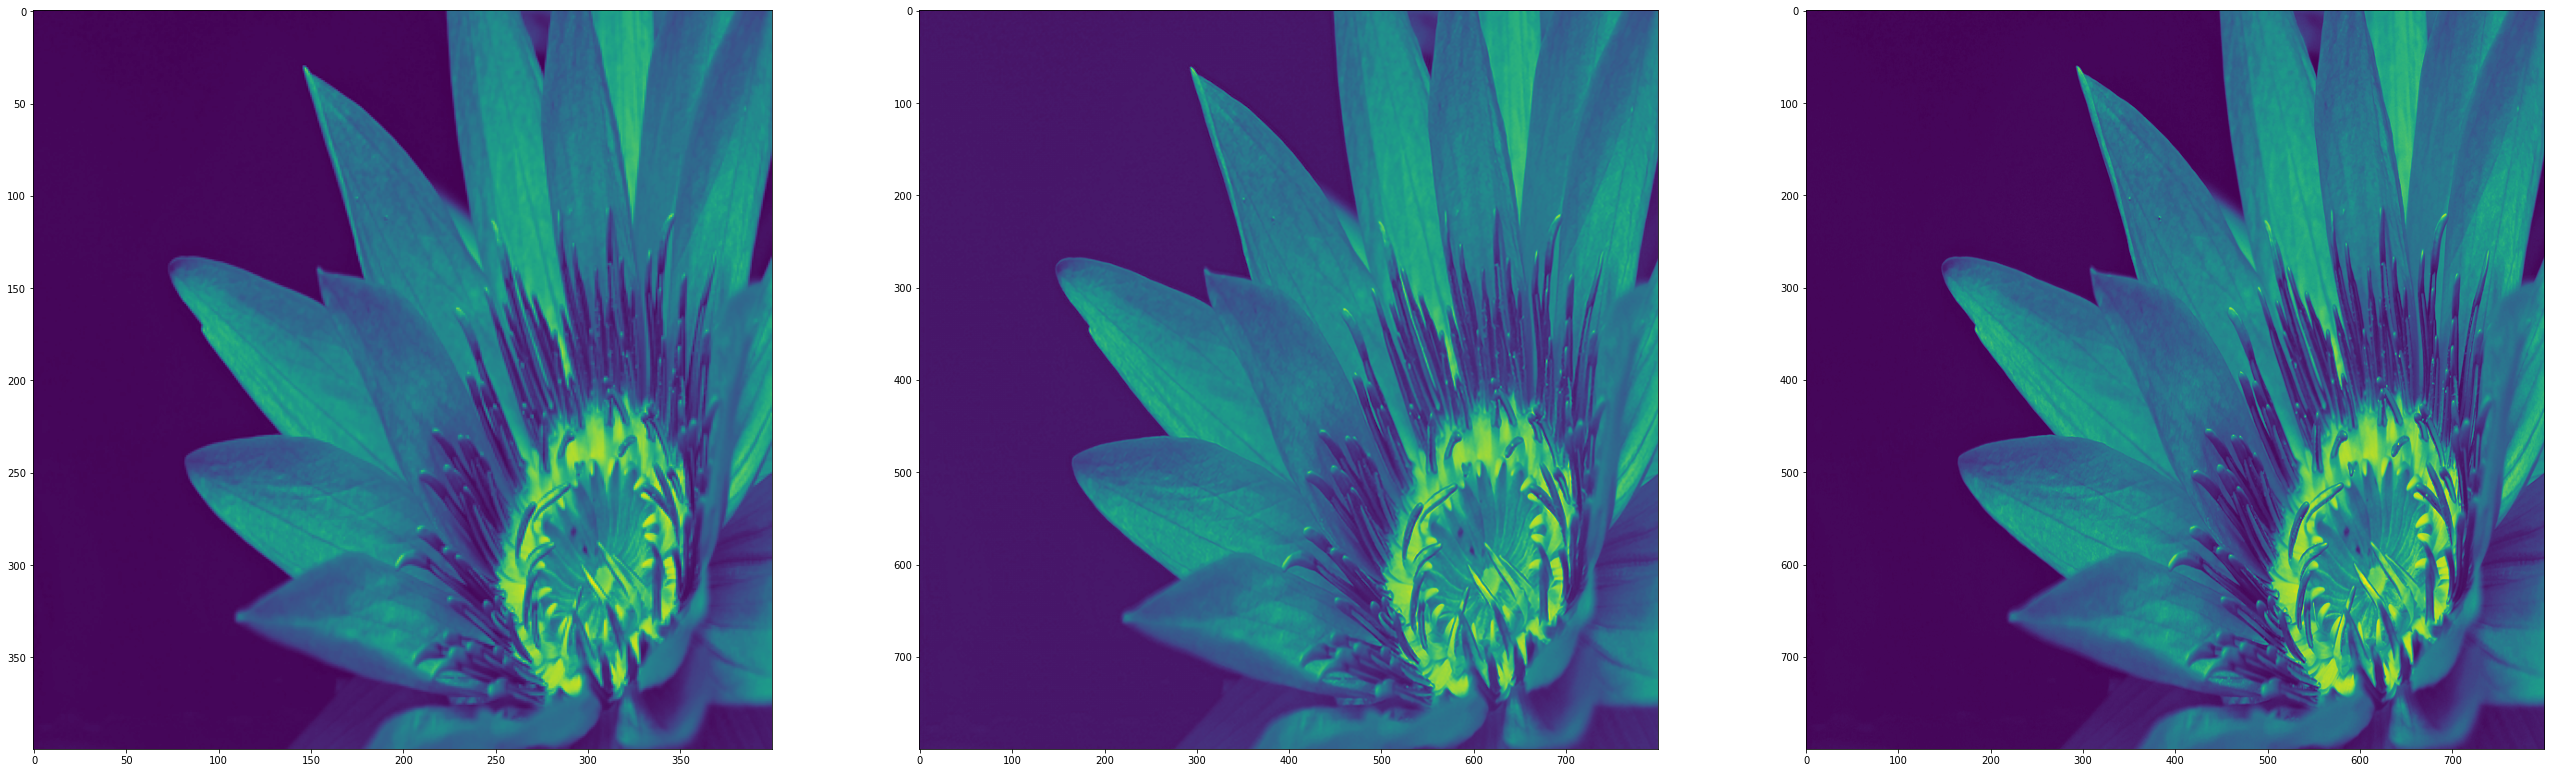

In [6]:
output_image=np.array(output)
image=Image.open("/home/raguhtic/Downloads/water-lilie_5120x2880.jpg")
newsize = (800,800)
image = image.resize(newsize)
imlryuv=image.convert('YCbCr')
y,u,v=imlryuv.split()
y=np.array(y).astype(np.float32)
y=y/255

# plt.figure(figsize=(5,5))
# plt.imshow(y)
output_image=np.reshape(output_image,(800,800))
plt.figure(figsize=(45,45))
plt.subplot(131)
plt.imshow(input_image)
plt.subplot(132)
plt.imshow(output_image)
plt.subplot(133)
plt.imshow(y)

In [7]:
def psnr(SR,HR):
  diff=np.subtract(HR,SR)
  mse=np.mean(np.power(diff,2))
  return -10*math.log10(mse)
def main():
     value = psnr(y, output_image)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()

PSNR value is 28.11817934742198 dB


In [9]:
from skimage.metrics import structural_similarity as ssim
ssim=ssim(output_image,y)
print(ssim)

0.9232207808790537


In [10]:
import cv2
# input_image = cv2.cvtColor(input_image, cv2.COLOR_GRAY2RGB)
cv2.imwrite("ESPCN_SCALE_4_input_image_500*500.jpg",input_image*255)
cv2.imwrite("ESPCN_SCALE_4_output_image_1000*1000.jpg",output_image*255)
cv2.imwrite("ESPCN_SCALE_4_HR_1000*1000.jpg",y*255)

True